#### Import stuff here for future use

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

### Dataset for testing

In [2]:
from sklearn.datasets import load_boston

# Polynomial Regression

In [145]:
data = load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)

x = df.AGE[:100]
target = data.target[:100]

In [146]:
# Store all required data
polymodel = []

# f iwill be used in function later to find y
f = []

# Max range will be the order (order is power of polynomial) +1
for i in range(1,10+1):
    polymodel.append((np.polyfit(x,target,i)))
    f.append(np.poly1d(polymodel[i-1]))
    print(f[i-1])

print(polymodel)

 
-0.1037 x + 28.14
           2
-0.002095 x + 0.1254 x + 23.45
            3            2
-3.562e-05 x + 0.003508 x - 0.1156 x + 25.84
           4             3           2
3.434e-07 x - 0.0001072 x + 0.00838 x - 0.2341 x + 26.54
           5             4            3           2
7.973e-08 x - 2.076e-05 x + 0.001915 x - 0.07587 x + 1.181 x + 20.31
            6             5             4            3          2
-6.142e-10 x + 2.741e-07 x - 4.438e-05 x + 0.003292 x - 0.1151 x + 1.663 x + 18.59
           7             6             5            4            3
-6.59e-11 x + 2.369e-08 x - 3.318e-06 x + 0.000227 x - 0.007771 x
           2
 + 0.1201 x - 0.6144 x + 25.51
           8             7            6             5            4
2.364e-12 x - 1.052e-09 x + 1.93e-07 x - 1.874e-05 x + 0.001028 x
            3          2
 - 0.03152 x + 0.4994 x - 3.455 x + 32.68
            9             8             7            6             5
-4.488e-14 x + 2.322e-11 x - 5.125e-09 x + 6.27e-07 

In [147]:
# Printing functions of x for y
print([print(f'Power {g+1}:\n\n {f[g]}\n\n\n\n') for g in range(len(f))])

Power 1:

  
-0.1037 x + 28.14




Power 2:

            2
-0.002095 x + 0.1254 x + 23.45




Power 3:

             3            2
-3.562e-05 x + 0.003508 x - 0.1156 x + 25.84




Power 4:

            4             3           2
3.434e-07 x - 0.0001072 x + 0.00838 x - 0.2341 x + 26.54




Power 5:

            5             4            3           2
7.973e-08 x - 2.076e-05 x + 0.001915 x - 0.07587 x + 1.181 x + 20.31




Power 6:

             6             5             4            3          2
-6.142e-10 x + 2.741e-07 x - 4.438e-05 x + 0.003292 x - 0.1151 x + 1.663 x + 18.59




Power 7:

            7             6             5            4            3
-6.59e-11 x + 2.369e-08 x - 3.318e-06 x + 0.000227 x - 0.007771 x
           2
 + 0.1201 x - 0.6144 x + 25.51




Power 8:

            8             7            6             5            4
2.364e-12 x - 1.052e-09 x + 1.93e-07 x - 1.874e-05 x + 0.001028 x
            3          2
 - 0.03152 x + 0.4994 x - 3.455 x + 32.68




P

#### Now that we know how to do it, we should make a function so that we can change it easily.

In [257]:
model = []
ff = []
    
def solve(x,target):
    ff.clear()
    
    for i in range(1,10+1):
        model.append((np.polyfit(x,target,i)))
        ff.append(np.poly1d(model[i-1]))
        
    # Printing functions of x for y
    #print([print(f'Power {g+1}:\n\n {f[g]}\n\n\n\n') for g in range(len(f))])
        
solve(x2,y)

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  







#### Next, we will use the functions to find y and plot it for each function

Text(0, 0.5, 'Prices (In 100k)')

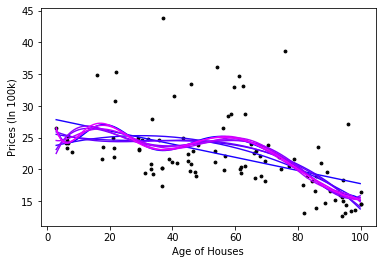

In [141]:
xx = np.arange(min(x),max(x),.1)

# First scatter plot the data for comparison

#To make it easier to see, change size (s) to small value
plt.scatter(x,y,s=8,c='black')

# Plot using everything in f

# Create dynamic colors so that it is easier to differentiate.
# Change values of c according to your preferences
for loop in range(len(f)):
    plt.plot(xx,f[loop-1](xx),c=(loop*0.1,0,1),lw=1.4)
plt.xlabel('Age of Houses'); plt.ylabel('Prices (In 100k)')

#### Find most accurate prediction

In [132]:
#Higher r value determines the accuracy
r_values = [np.corrcoef(f[k-1](x),y)[0][1] for k in range(len(f))]

max(r_values)

print(f'The index of the highest r value: {r_values.index(max(r_values))}\nThe highest r value: {r_values[0]}')

The index of the highest r value: 0
The highest r value: 0.5865310552784397


In [277]:
# Make Function for this

def find_r(a,b):
    return(np.corrcoef(a,b)[0][1])

#### What if x is replaced with ptratio from dataset?

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


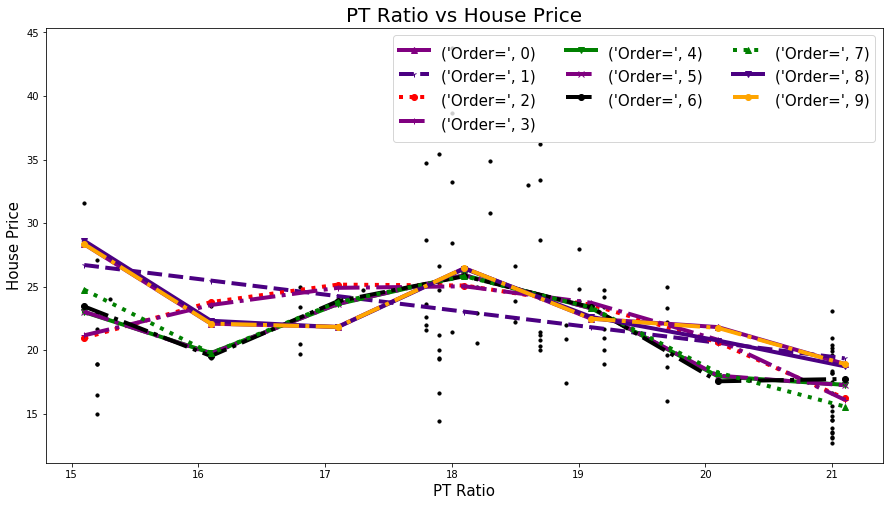

In [258]:
# x2 becomes the ptratio of houses in boston
x2 = df.PTRATIO[:100]

xx2 = np.arange(min(x2),max(x2),1)

# Use the new function
solve(x2,y)

# Customizing the plot
markerr = ['+','x','o','^','v','8','1']
colors = ['red','blue','cyan','orange','purple','green','black','indigo']
line_styles = ['-', '--', '-.', ':']


plt.figure(figsize=(15,8))

plt.scatter(x2,y,s=10,c='black')
for loop in range(len(ff)):
    plt.plot(xx2,ff[loop-1](xx2),c=np.random.choice(colors),marker=np.random.choice(markerr),lw=4,
             label=('Order=', loop),ls=np.random.choice(line_styles))

plt.xlabel("PT Ratio",size=15); plt.ylabel("House Price",size=15)
plt.title("PT Ratio vs House Price",size=20)

plt.legend(prop={'size': 15},handleheight=2, labelspacing=0.05, ncol=3)

In [280]:
r_values.clear()

for check in range(len(ff)):
    r_values.append(find_r(target,ff[check-1](x2)))

r_values
print(f"Best function to use is {ff[r_values.index(max(r_values))]} which is {max(r_values)}")

Best function to use is  
-1.224 x + 45.19 which is 0.603907776378559


In [274]:
print(ff[2](x))

[-4.92416820e+03 -9.83446998e+03 -3.85927284e+03 -1.21629427e+03
 -2.42787945e+03 -3.31231388e+03 -5.32744705e+03 -1.95416877e+04
 -2.23829593e+04 -1.32618379e+04 -1.83152156e+04 -1.17100998e+04
 -5.89348872e+02 -4.02919286e+03 -1.25218233e+04 -2.85767301e+03
 -1.15316987e+02 -1.11246603e+04 -4.31218678e+02 -6.23038793e+03
 -2.09668489e+04 -1.51191750e+04 -1.66352499e+04 -2.23829593e+04
 -1.81821746e+04 -1.31543997e+04 -1.57744542e+04 -1.48854309e+04
 -1.83819770e+04 -1.40301779e+04 -1.81821746e+04 -2.23829593e+04
 -1.12691652e+04 -1.87859298e+04 -2.01037883e+04 -5.81414949e+03
 -3.93151074e+03 -7.87413211e+02 -1.42459285e+02  1.16243595e+01
  2.29401133e+01 -1.81654970e+01 -1.38136259e+01 -1.41171528e+01
 -6.64328133e+02 -2.82775598e+02 -2.60051086e+02 -1.30475379e+04
 -1.89900908e+04 -4.07862233e+03 -1.20496311e+03 -4.33171539e+03
  1.61031303e+01  1.43073479e+01 -1.43197479e+03  1.09007933e+01
 -3.79452618e+02 -7.03916976e+02 -1.12482411e+02 -1.38209988e+03
 -5.21009912e+03 -1.77215